# Fashion MNIST - Exploratory Data Analysis (EDA)

This notebook provides a concise analysis of the Fashion MNIST dataset including:
- Dataset size and class distribution
- Image dimensions and channels
- Sample visualizations per class
- Preprocessing recommendations

In [4]:
%pip install pandas
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl (2.3 MB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
  Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl (7.0 MB)
  Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load Dataset

In [8]:
# Load training and test data
train_df = pd.read_csv('archive/fashion-mnist_train.csv')
test_df = pd.read_csv('archive/fashion-mnist_test.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"\nFirst few columns: {train_df.columns[:5].tolist()}")

Training set shape: (60000, 785)
Test set shape: (10000, 785)

First few columns: ['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4']


## 2. Dataset Size and Class Distribution

In [9]:
# Fashion MNIST class labels
class_names = [
    'T-shirt/top',  # 0
    'Trouser',      # 1
    'Pullover',     # 2
    'Dress',        # 3
    'Coat',         # 4
    'Sandal',       # 5
    'Shirt',        # 6
    'Sneaker',      # 7
    'Bag',          # 8
    'Ankle boot'    # 9
]

# Dataset sizes
print("=" * 50)
print("DATASET SIZE")
print("=" * 50)
print(f"Training samples: {len(train_df):,}")
print(f"Test samples: {len(test_df):,}")
print(f"Total samples: {len(train_df) + len(test_df):,}")
print(f"Number of classes: {len(class_names)}")
print(f"Number of features: {len(train_df.columns) - 1}")

DATASET SIZE
Training samples: 60,000
Test samples: 10,000
Total samples: 70,000
Number of classes: 10
Number of features: 784


In [10]:
# Class distribution in training set
train_class_dist = train_df['label'].value_counts().sort_index()
test_class_dist = test_df['label'].value_counts().sort_index()

print("\n" + "=" * 50)
print("CLASS DISTRIBUTION")
print("=" * 50)
print("\nTraining Set:")
for label, count in train_class_dist.items():
    percentage = (count / len(train_df)) * 100
    print(f"  {label}: {class_names[label]:15} - {count:,} samples ({percentage:.2f}%)")

print("\nTest Set:")
for label, count in test_class_dist.items():
    percentage = (count / len(test_df)) * 100
    print(f"  {label}: {class_names[label]:15} - {count:,} samples ({percentage:.2f}%)")


CLASS DISTRIBUTION

Training Set:
  0: T-shirt/top     - 6,000 samples (10.00%)
  1: Trouser         - 6,000 samples (10.00%)
  2: Pullover        - 6,000 samples (10.00%)
  3: Dress           - 6,000 samples (10.00%)
  4: Coat            - 6,000 samples (10.00%)
  5: Sandal          - 6,000 samples (10.00%)
  6: Shirt           - 6,000 samples (10.00%)
  7: Sneaker         - 6,000 samples (10.00%)
  8: Bag             - 6,000 samples (10.00%)
  9: Ankle boot      - 6,000 samples (10.00%)

Test Set:
  0: T-shirt/top     - 1,000 samples (10.00%)
  1: Trouser         - 1,000 samples (10.00%)
  2: Pullover        - 1,000 samples (10.00%)
  3: Dress           - 1,000 samples (10.00%)
  4: Coat            - 1,000 samples (10.00%)
  5: Sandal          - 1,000 samples (10.00%)
  6: Shirt           - 1,000 samples (10.00%)
  7: Sneaker         - 1,000 samples (10.00%)
  8: Bag             - 1,000 samples (10.00%)
  9: Ankle boot      - 1,000 samples (10.00%)


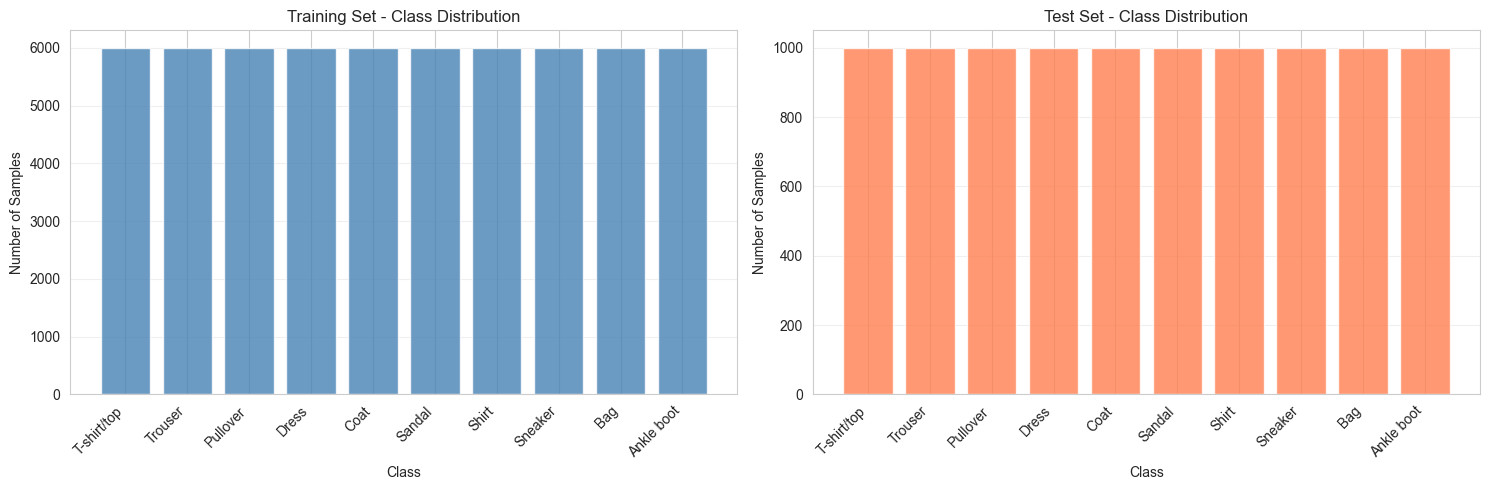


Dataset is balanced.


In [11]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training distribution
axes[0].bar(range(10), train_class_dist.values, color='steelblue', alpha=0.8)
axes[0].set_xticks(range(10))
axes[0].set_xticklabels(class_names, rotation=45, ha='right')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Samples')
axes[0].set_title('Training Set - Class Distribution')
axes[0].grid(axis='y', alpha=0.3)

# Test distribution
axes[1].bar(range(10), test_class_dist.values, color='coral', alpha=0.8)
axes[1].set_xticks(range(10))
axes[1].set_xticklabels(class_names, rotation=45, ha='right')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Number of Samples')
axes[1].set_title('Test Set - Class Distribution')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Check if balanced
is_balanced = train_class_dist.std() < (train_class_dist.mean() * 0.05)
print(f"\nDataset is {'balanced' if is_balanced else 'imbalanced'}.")

## 3. Image Dimensions and Channels

In [12]:
# Extract image dimensions
num_pixels = len(train_df.columns) - 1  # Exclude label column
image_size = int(np.sqrt(num_pixels))

print("=" * 50)
print("IMAGE PROPERTIES")
print("=" * 50)
print(f"Total pixels per image: {num_pixels:,}")
print(f"Image dimensions: {image_size} x {image_size}")
print(f"Number of channels: 1 (Grayscale)")
print(f"Pixel value range: [0, 255]")
print(f"Data type: uint8")

# Reshape a sample image to verify
sample_image = train_df.iloc[0, 1:].values.reshape(image_size, image_size)
print(f"\nSample image shape after reshape: {sample_image.shape}")
print(f"Sample pixel values (first 5x5 corner):\n{sample_image[:5, :5]}")

IMAGE PROPERTIES
Total pixels per image: 784
Image dimensions: 28 x 28
Number of channels: 1 (Grayscale)
Pixel value range: [0, 255]
Data type: uint8

Sample image shape after reshape: (28, 28)
Sample pixel values (first 5x5 corner):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 4]
 [0 0 0 0 0]]



PIXEL INTENSITY STATISTICS
Mean: 72.96
Std: 89.97
Min: 0
Max: 255
Median: 0.00


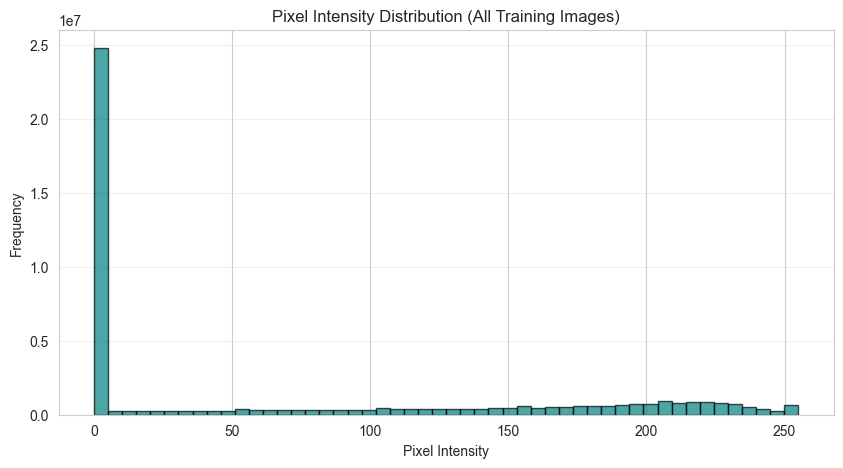

In [13]:
# Pixel intensity statistics
pixel_values = train_df.iloc[:, 1:].values.flatten()

print("\n" + "=" * 50)
print("PIXEL INTENSITY STATISTICS")
print("=" * 50)
print(f"Mean: {pixel_values.mean():.2f}")
print(f"Std: {pixel_values.std():.2f}")
print(f"Min: {pixel_values.min()}")
print(f"Max: {pixel_values.max()}")
print(f"Median: {np.median(pixel_values):.2f}")

# Plot pixel intensity distribution
plt.figure(figsize=(10, 5))
plt.hist(pixel_values, bins=50, color='teal', alpha=0.7, edgecolor='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution (All Training Images)')
plt.grid(axis='y', alpha=0.3)
plt.show()

## 4. Sample Images Per Class

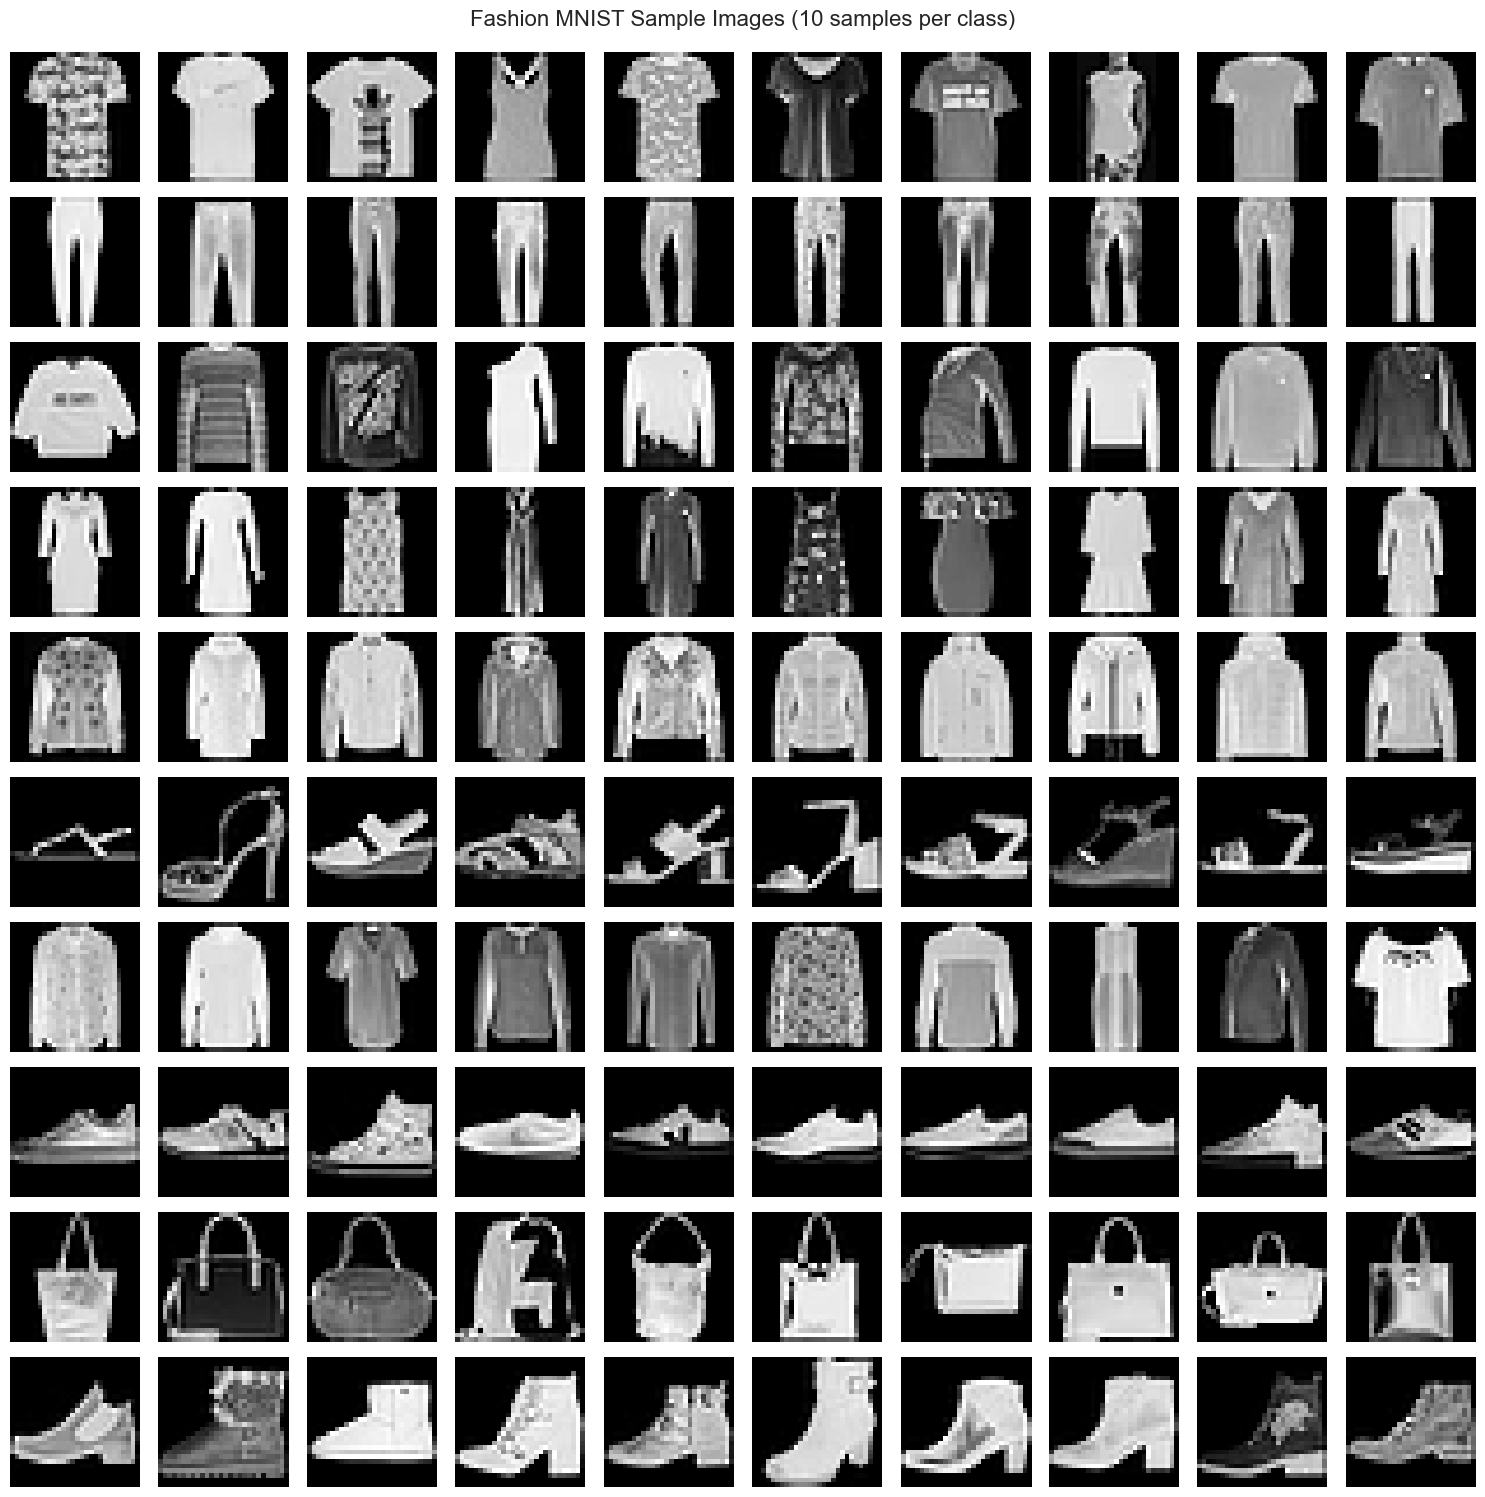

In [14]:
# Display sample images for each class
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle('Fashion MNIST Sample Images (10 samples per class)', fontsize=16, y=0.995)

for class_idx in range(10):
    # Get samples for this class
    class_samples = train_df[train_df['label'] == class_idx].iloc[:10]
    
    for sample_idx in range(10):
        if sample_idx < len(class_samples):
            image = class_samples.iloc[sample_idx, 1:].values.reshape(28, 28)
            axes[class_idx, sample_idx].imshow(image, cmap='gray')
        axes[class_idx, sample_idx].axis('off')
        
        # Add class name to first column
        if sample_idx == 0:
            axes[class_idx, sample_idx].set_ylabel(class_names[class_idx], 
                                                     rotation=0, 
                                                     labelpad=40, 
                                                     fontsize=10,
                                                     ha='right')

plt.tight_layout()
plt.show()

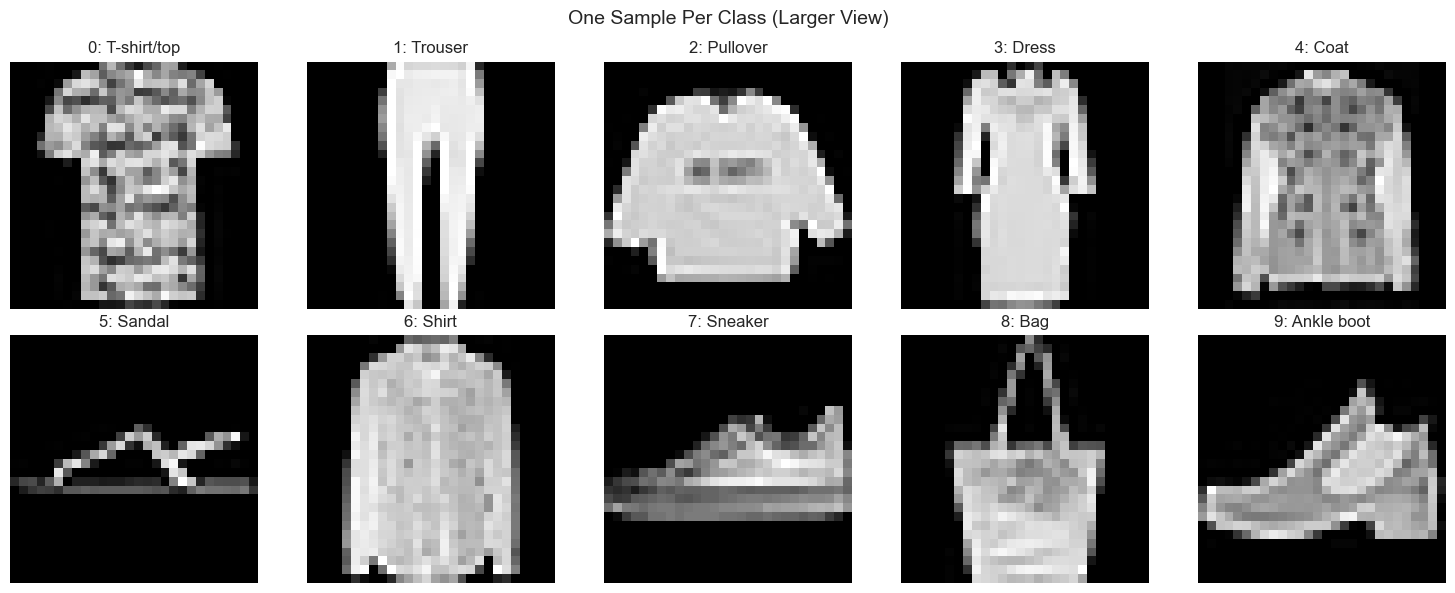

In [15]:
# Display larger individual samples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('One Sample Per Class (Larger View)', fontsize=14)

for class_idx in range(10):
    row = class_idx // 5
    col = class_idx % 5
    
    # Get one sample
    sample = train_df[train_df['label'] == class_idx].iloc[0, 1:].values.reshape(28, 28)
    
    axes[row, col].imshow(sample, cmap='gray')
    axes[row, col].set_title(f'{class_idx}: {class_names[class_idx]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## 5. Preprocessing Requirements

In [16]:
print("=" * 50)
print("PREPROCESSING RECOMMENDATIONS")
print("=" * 50)

print("\n1. NORMALIZATION:")
print("   - Current range: [0, 255]")
print("   - Recommended: Normalize to [0, 1] by dividing by 255")
print("   - Alternative: Standardize to mean=0, std=1")
print(f"   - Formula: (pixel - {pixel_values.mean():.2f}) / {pixel_values.std():.2f}")

print("\n2. RESHAPING:")
print("   - Current format: Flattened vectors (784 features)")
print("   - For CNN: Reshape to (28, 28, 1) - Height × Width × Channels")
print("   - For fully connected: Keep as (784,) or flatten to (28*28,)")

print("\n3. LABEL ENCODING:")
print("   - Current: Integer labels [0-9]")
print("   - For classification: One-hot encode to (10,) vectors")
print("   - Example: 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]")

print("\n4. DATA SPLIT:")
print("   - Training set: 60,000 samples (already split)")
print("   - Test set: 10,000 samples (already split)")
print("   - Consider: Validation split from training (e.g., 10% → 54k train, 6k val)")

print("\n5. RESIZING:")
print("   - Current size: 28×28 pixels")
print("   - No resizing needed (optimal size for Fashion MNIST)")
print("   - Already square and uniform dimensions")

print("\n6. DATA AUGMENTATION (Optional):")
print("   - Random rotations (±10-15 degrees)")
print("   - Random shifts (±2-3 pixels)")
print("   - Random zoom (±10%)")
print("   - Horizontal flip (NOT recommended for this dataset)")

PREPROCESSING RECOMMENDATIONS

1. NORMALIZATION:
   - Current range: [0, 255]
   - Recommended: Normalize to [0, 1] by dividing by 255
   - Alternative: Standardize to mean=0, std=1
   - Formula: (pixel - 72.96) / 89.97

2. RESHAPING:
   - Current format: Flattened vectors (784 features)
   - For CNN: Reshape to (28, 28, 1) - Height × Width × Channels
   - For fully connected: Keep as (784,) or flatten to (28*28,)

3. LABEL ENCODING:
   - Current: Integer labels [0-9]
   - For classification: One-hot encode to (10,) vectors
   - Example: 3 → [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

4. DATA SPLIT:
   - Training set: 60,000 samples (already split)
   - Test set: 10,000 samples (already split)
   - Consider: Validation split from training (e.g., 10% → 54k train, 6k val)

5. RESIZING:
   - Current size: 28×28 pixels
   - No resizing needed (optimal size for Fashion MNIST)
   - Already square and uniform dimensions

6. DATA AUGMENTATION (Optional):
   - Random rotations (±10-15 degrees)
   - Random 


PREPROCESSING EXAMPLE

Original:
  Shape: (784,)
  Range: [0, 255]
  Label: 2 (Pullover)

Normalized (÷255):
  Range: [0.0000, 1.0000]

Reshaped for CNN:
  Shape: (28, 28, 1)

One-hot encoded label:
  [0 0 1 0 0 0 0 0 0 0]


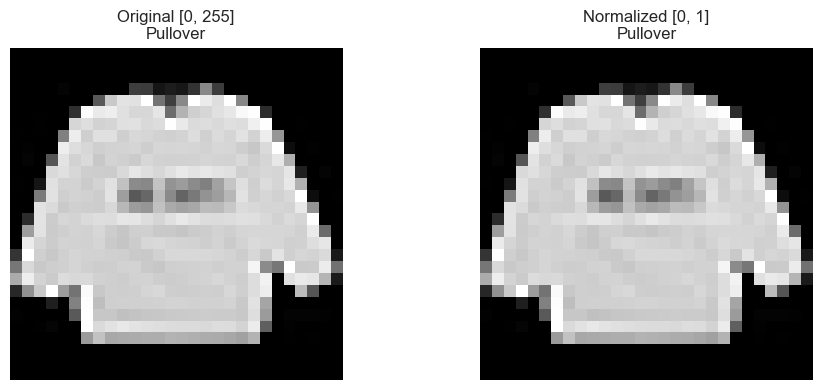

In [17]:
# Demonstrate preprocessing
print("\n" + "=" * 50)
print("PREPROCESSING EXAMPLE")
print("=" * 50)

# Get one sample
X_sample = train_df.iloc[0, 1:].values
y_sample = train_df.iloc[0, 0]

print(f"\nOriginal:")
print(f"  Shape: {X_sample.shape}")
print(f"  Range: [{X_sample.min()}, {X_sample.max()}]")
print(f"  Label: {y_sample} ({class_names[y_sample]})")

# Normalize
X_normalized = X_sample / 255.0
print(f"\nNormalized (÷255):")
print(f"  Range: [{X_normalized.min():.4f}, {X_normalized.max():.4f}]")

# Reshape for CNN
X_reshaped = X_normalized.reshape(28, 28, 1)
print(f"\nReshaped for CNN:")
print(f"  Shape: {X_reshaped.shape}")

# One-hot encode label
y_onehot = np.zeros(10)
y_onehot[y_sample] = 1
print(f"\nOne-hot encoded label:")
print(f"  {y_onehot.astype(int)}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(X_sample.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
axes[0].set_title(f'Original [0, 255]\n{class_names[y_sample]}')
axes[0].axis('off')

axes[1].imshow(X_normalized.reshape(28, 28), cmap='gray', vmin=0, vmax=1)
axes[1].set_title(f'Normalized [0, 1]\n{class_names[y_sample]}')
axes[1].axis('off')

plt.tight_layout()
plt.show()